<a href="https://colab.research.google.com/github/AlejandroPSJ2/Data_Mining/blob/main/Clustering_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#LIBRERIAS BASICAS

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
# FUNCIONES PARA CLUSTERING

def centroides(a,b):
    res = pd.DataFrame(data=b)
    i=0
    for x in a.columns:
        res.rename(columns={i:x},inplace=True)
        i = i+1
    res.reset_index(inplace=True)
    res.rename(columns={'index':'cluster'},inplace=True)
    return res 
    
def clusteres(a,b): 
    lab = pd.DataFrame(data=b)
    ax = a.join(lab)
    ax.rename(columns={0:'cluster'},inplace=True)  
    return ax

def elbow(X):
    sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        k_means = KMeans(n_clusters=k)
        model = k_means.fit(X)
        sum_of_squared_distances.append(k_means.inertia_)

    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('sum_of_squared_distances')
    plt.title('elbow method for optimal k')
    plt.show()
    return sum_of_squared_distances

def silhouette(X):
    sil = []
    K = range(2, 15)
    for k in K:
      kmeans = KMeans(n_clusters = k).fit(X)
      labels = kmeans.labels_
      sil.append(silhouette_score(X, labels, metric = 'euclidean'))

    plt.plot(K, sil, 'bx-')
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.title('silhouette method for optimal k')
    plt.show()
    return sil

In [3]:
#DATA LOADING & PREVIEW

url = 'https://raw.githubusercontent.com/AlejandroPSJ2/Data_Mining/main/clustering_data2_norm.csv'
df = pd.read_csv(url,sep=';')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [5]:
#DATA PREPARATION (VERY IMPORTANT TO DIFFERENTIATE "X" AND "DF")

X = df.drop(columns='country')

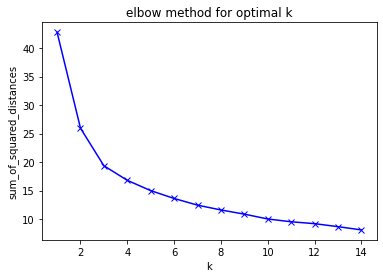

[42.798718776352864, 25.943231842930718, 19.34562204131999, 16.784452806059292, 14.977686908169813, 13.600214865692612, 12.42686474770518, 11.58140686541396, 10.846304882169163, 9.996856719868962, 9.506661343462579, 9.174137254645425, 8.648429689740501, 8.0769344674029]


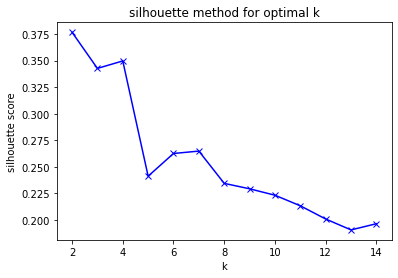

[0.37671430586803784, 0.3426547409636894, 0.34967581488826804, 0.24113155323175775, 0.26251398567612705, 0.2647628951568657, 0.23435358449749966, 0.2292402574899043, 0.22319586474653413, 0.2132253610809944, 0.20078427490884387, 0.1905151368727645, 0.19635679780195106]


In [6]:
# OPTIMAL NUMBER "K" OF CLUSTERS

print(elbow(X))
print(silhouette(X))

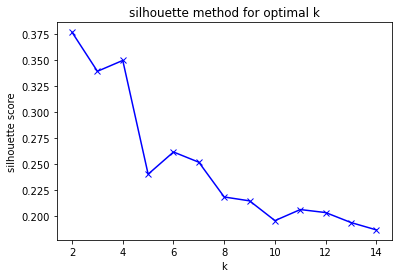

[0.37671430586803784, 0.3392590989600407, 0.34967581488826804, 0.24057652922959824, 0.26185758120581853, 0.25203987762431695, 0.2187039212634428, 0.21499619106076556, 0.1960481453110853, 0.20664908061910045, 0.20376208636152962, 0.1941790115446552, 0.1871242821869047]


In [7]:
# ALGORITHM FIT

kmeans = KMeans(n_clusters=4, random_state=44).fit(X)

In [8]:
# CLUSTER CENTROIDS

print('Centroides optimos de 4 clusteres')
print(centroides(X,kmeans.cluster_centers_))

Centroides optimos de 4 clusteres
   cluster  child_mort   exports  ...  life_expec  total_fer      gdpp
0        0    0.095659  0.203542  ...    0.799134   0.178759  0.063018
1        1    0.011213  0.231969  ...    0.950372   0.100336  0.404158
2        2    0.441503  0.145970  ...    0.538333   0.621485  0.013982
3        3    0.007465  0.879935  ...    0.973044   0.036278  0.547258

[4 rows x 10 columns]


In [9]:
# CLUSTER RESULTS

print('Asignacion de clusteres segun cada observacion')
print(clusteres(df,kmeans.labels_).head())

Asignacion de clusteres segun cada observacion
               country  child_mort   exports  ...  total_fer      gdpp  cluster
0          Afghanistan    0.426485  0.049482  ...   0.736593  0.003073        2
1              Albania    0.068160  0.139531  ...   0.078864  0.036833        0
2              Algeria    0.120253  0.191559  ...   0.274448  0.040365        0
3               Angola    0.566699  0.311125  ...   0.790221  0.031488        2
4  Antigua and Barbuda    0.037488  0.227079  ...   0.154574  0.114242        0

[5 rows x 11 columns]


In [10]:
clusteres(df,kmeans.labels_).to_csv('results.csv')